In [2]:
import pandas as pd 
import openpyxl
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import time
start_time = time.time()

In [3]:
file_path ='F:\Block.xlsx'
SN = 'Sheet1'
df = pd.read_excel(file_path, SN, engine = 'openpyxl')

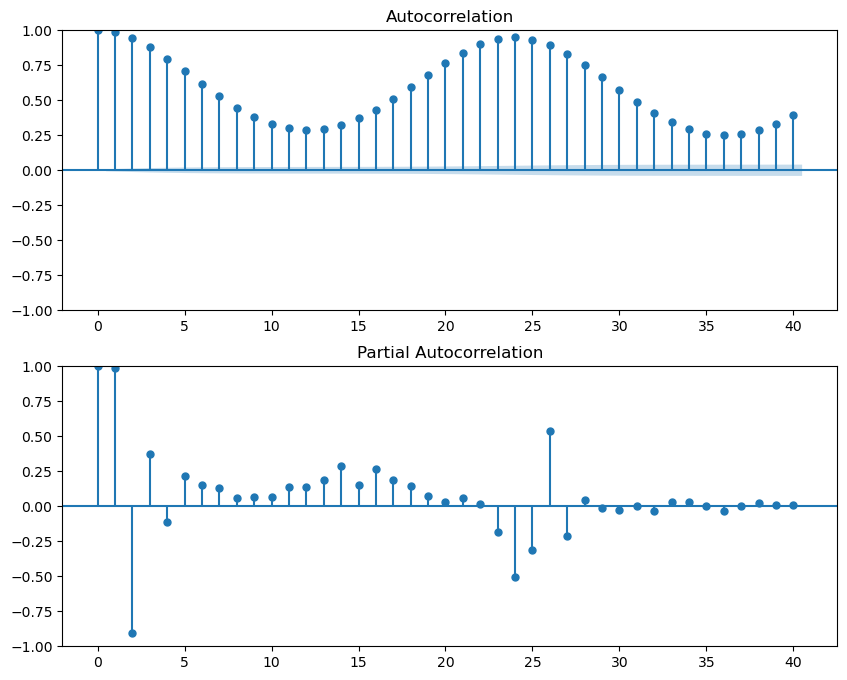

In [4]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plot_acf(df['D'].dropna(), ax=plt.gca(), lags=40)

plt.subplot(212)
plot_pacf(df['D'].dropna(), ax=plt.gca(), lags=40, method='ywm')
plt.show()

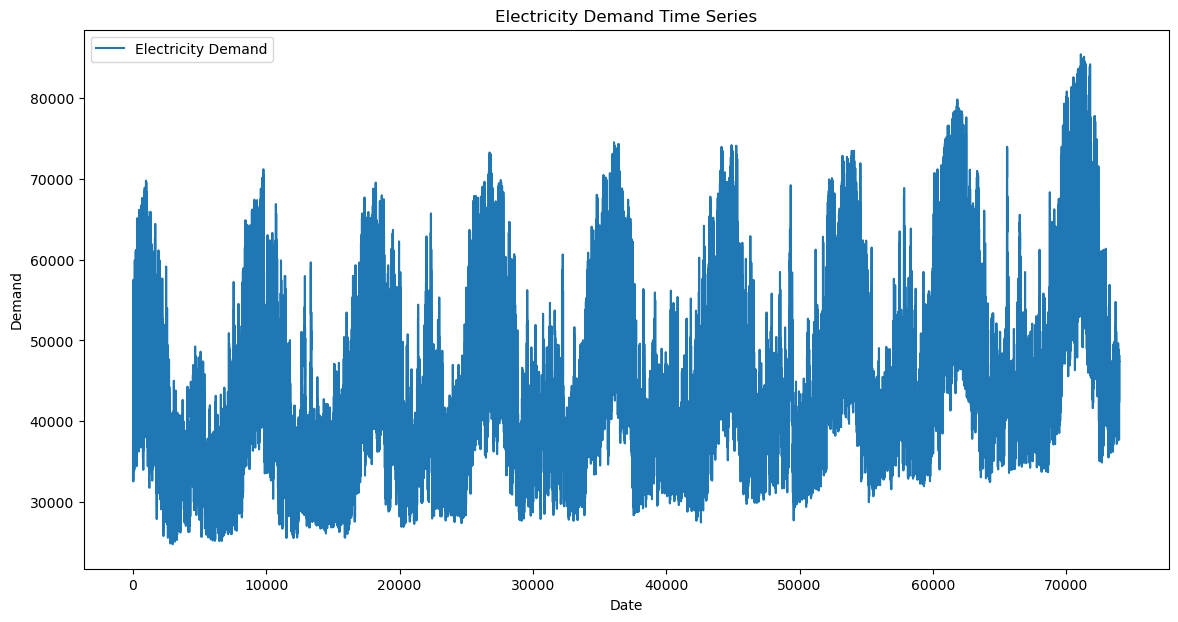

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(df['D'], label='Electricity Demand')
plt.title('Electricity Demand Time Series')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [6]:
adf_result = adfuller(df['D'])
print(f'ADF Statistic: {adf_result[0]}')

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

ADF Statistic: -8.066731962206434


Test Statistic                -8.066732e+00
p-value                        1.588907e-12
#Lags Used                     6.300000e+01
Number of Observations Used    7.392900e+04
Critical Value (1%)           -3.430438e+00
Critical Value (5%)           -2.861579e+00
Critical Value (10%)          -2.566791e+00
dtype: float64

In [7]:
YVar = df.D[0:73994]

In [8]:
P=1
D=1
Q=1

p=1
d=1
q=1
s = 24
model = SARIMAX(YVar, order=(p, d, q), seasonal_order=(P, D, Q, s))

In [9]:
results = model.fit()

In [10]:
model_summary = results.summary()

In [11]:
print(model_summary)

                                     SARIMAX Results                                      
Dep. Variable:                                  D   No. Observations:                73993
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -539863.718
Date:                            Sun, 10 Dec 2023   AIC                        1079737.436
Time:                                    13:54:47   BIC                        1079783.493
Sample:                                         0   HQIC                       1079751.606
                                          - 73993                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.002    391.491      0.000       0.595       0.601
ma.L1          0.4176      0.001   

In [12]:
predicted_value = results.predict()
actual_value = YVar
print(predicted_value)

0            0.000000
1        42523.932182
2        36538.338336
3        33885.911841
4        32722.496062
             ...     
73988    48156.863330
73989    46487.031913
73990    45735.198799
73991    44097.061077
73992    42568.572388
Name: predicted_mean, Length: 73993, dtype: float64


In [14]:
original_df = pd.read_excel(file_path, sheet_name=SN)
original_df['Predicted_D_SARIMA'] = predicted_value.ravel()
updated_file_path = 'Block.xlsx'
original_df.to_excel(file_path, index=False)

In [15]:
r2 = r2_score(actual_value, predicted_value)
mse = mean_squared_error(actual_value, predicted_value)
rmse = sqrt(mse)
print('R-Sqaured is: ',r2)
print('Mean Sqaure Error is: ',mse)
print('Root Mean Sqaure Error is: ',rmse)

R-Sqaured is:  0.9986120737002044
Mean Sqaure Error is:  155390.67193382894
Root Mean Sqaure Error is:  394.1962353115881


In [29]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 105.97225832939148 seconds
